# The purpose of this study was to leverage machine learning models such as KNN and Random Forest to predict the patients suffering from stroke

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the statistical libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

In [2]:
df = pd.read_csv('stroke data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#The id coulmn doesnt seem to be of any importance so let's drop it
df.drop('id', axis=1, inplace=True)

In [7]:
#hypertension, heart disease and stroke are categorical variables but stored in numerical format

df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


It's been correctly changed over to str/object data type

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


# EDA

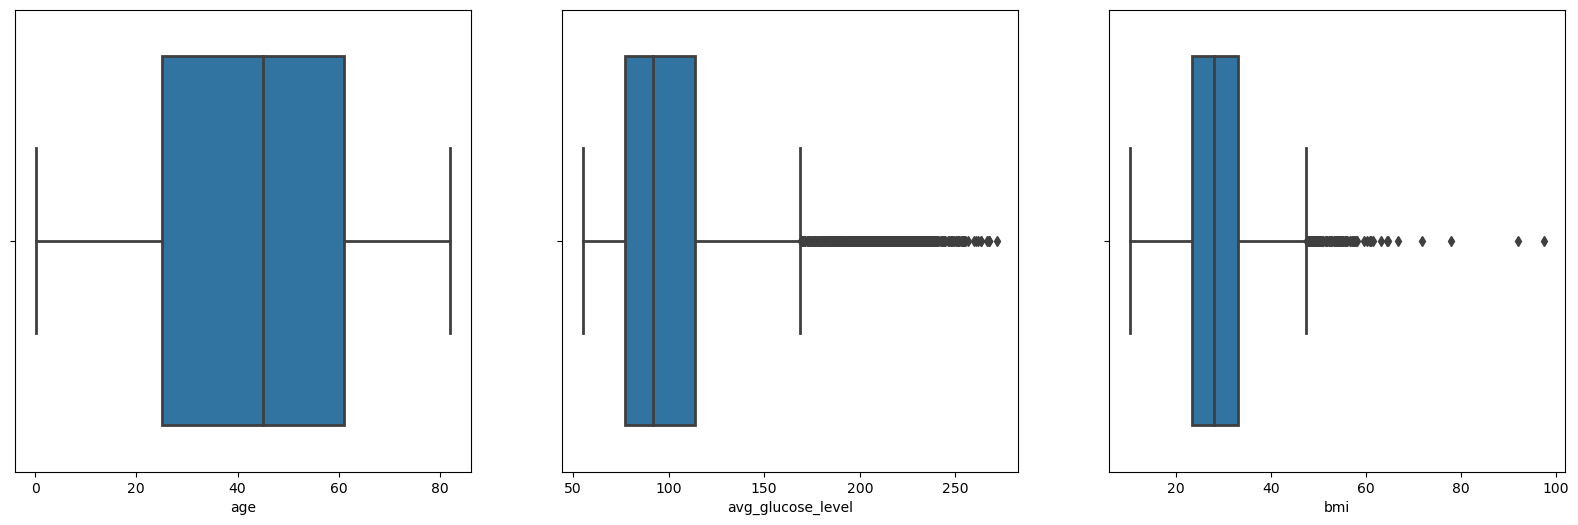

In [10]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.boxplot(x=df['age'], ax=ax[0], linewidth=2)
sns.boxplot(x=df['avg_glucose_level'], ax=ax[1], linewidth=2)
sns.boxplot(x=df['bmi'], ax=ax[2], linewidth=2)
plt.show()

It's clear that there are many outliers in the avg glucose level and the bmi column so let's check how their distribution changes to the target variable and then deal with these outliers

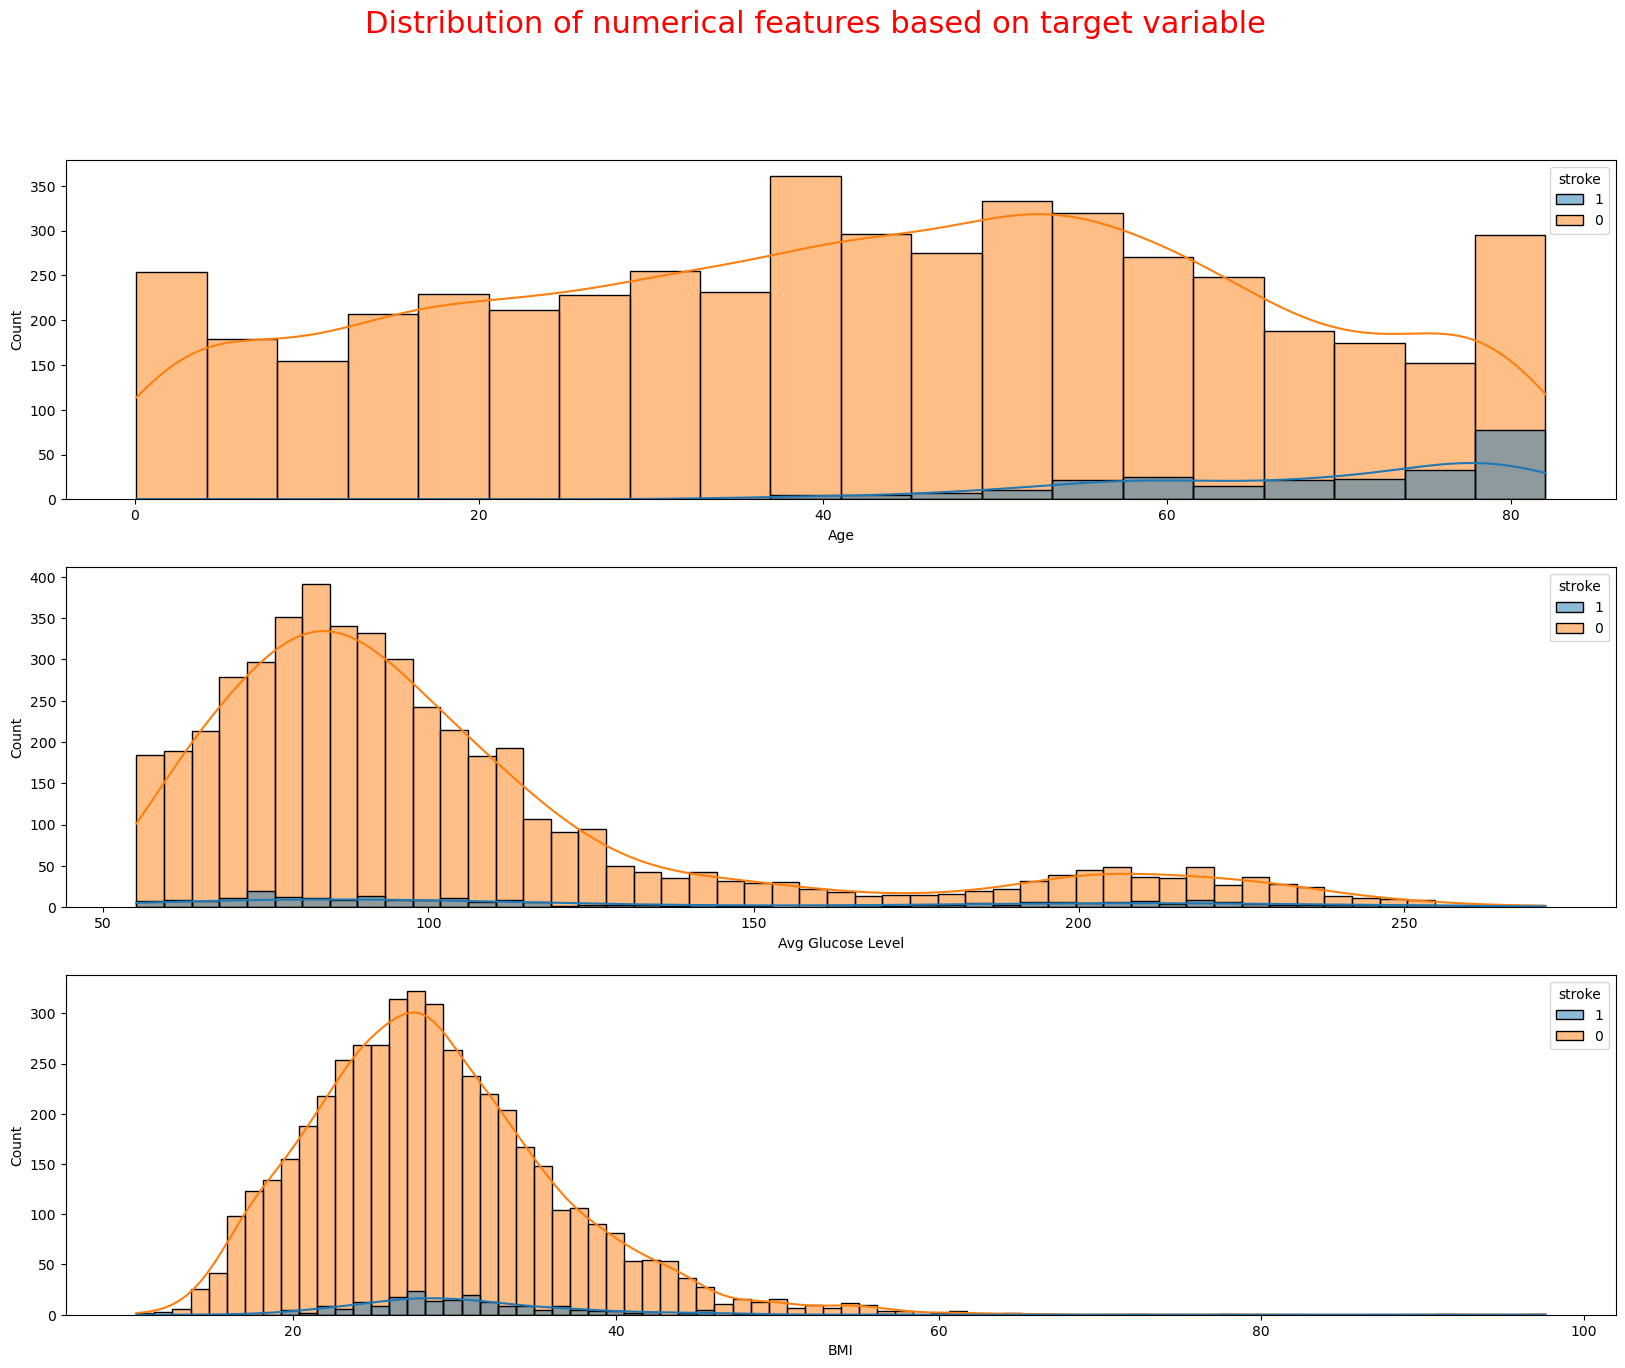

In [11]:
fig, ax= plt.subplots(3,1, figsize=(20,15))
plt.suptitle('Distribution of numerical features based on target variable', fontsize=22, color='red')

sns.histplot(x=df['age'], ax=ax[0], kde=True, hue=df['stroke'])
ax[0].set(xlabel='Age')

sns.histplot(x=df['avg_glucose_level'], ax=ax[1], kde=True, hue=df['stroke'])
ax[1].set(xlabel='Avg Glucose Level')

sns.histplot(x=df['bmi'], ax=ax[2], kde=True, hue=df['stroke'])
ax[2].set(xlabel='BMI')


plt.show()

It's clear that the older people have much higher chance of suffering from a stroke as depicted in the above graph. 

However, Average glucose level and BMI seems to be distributed disproportionately so we can apply log transformation for model building 

In [12]:
for col in ['avg_glucose_level', 'bmi']:
    df[col] = np.log(df[col])

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
avg_glucose_level,5110.0,4.592465,0.361985,4.009513,4.346982,4.520538,4.736988,5.604846
bmi,4909.0,3.328423,0.265064,2.332144,3.157000,3.335770,3.499533,4.580877


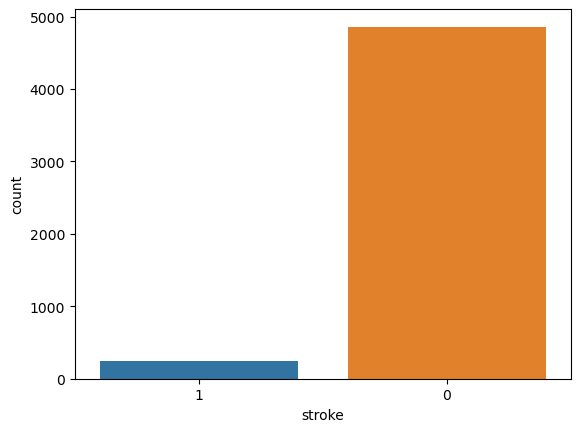

In [14]:
sns.countplot(x=df['stroke'])
plt.show()

The number of patients having is stroke is relatively very less in our dataset so we should keep that in mind

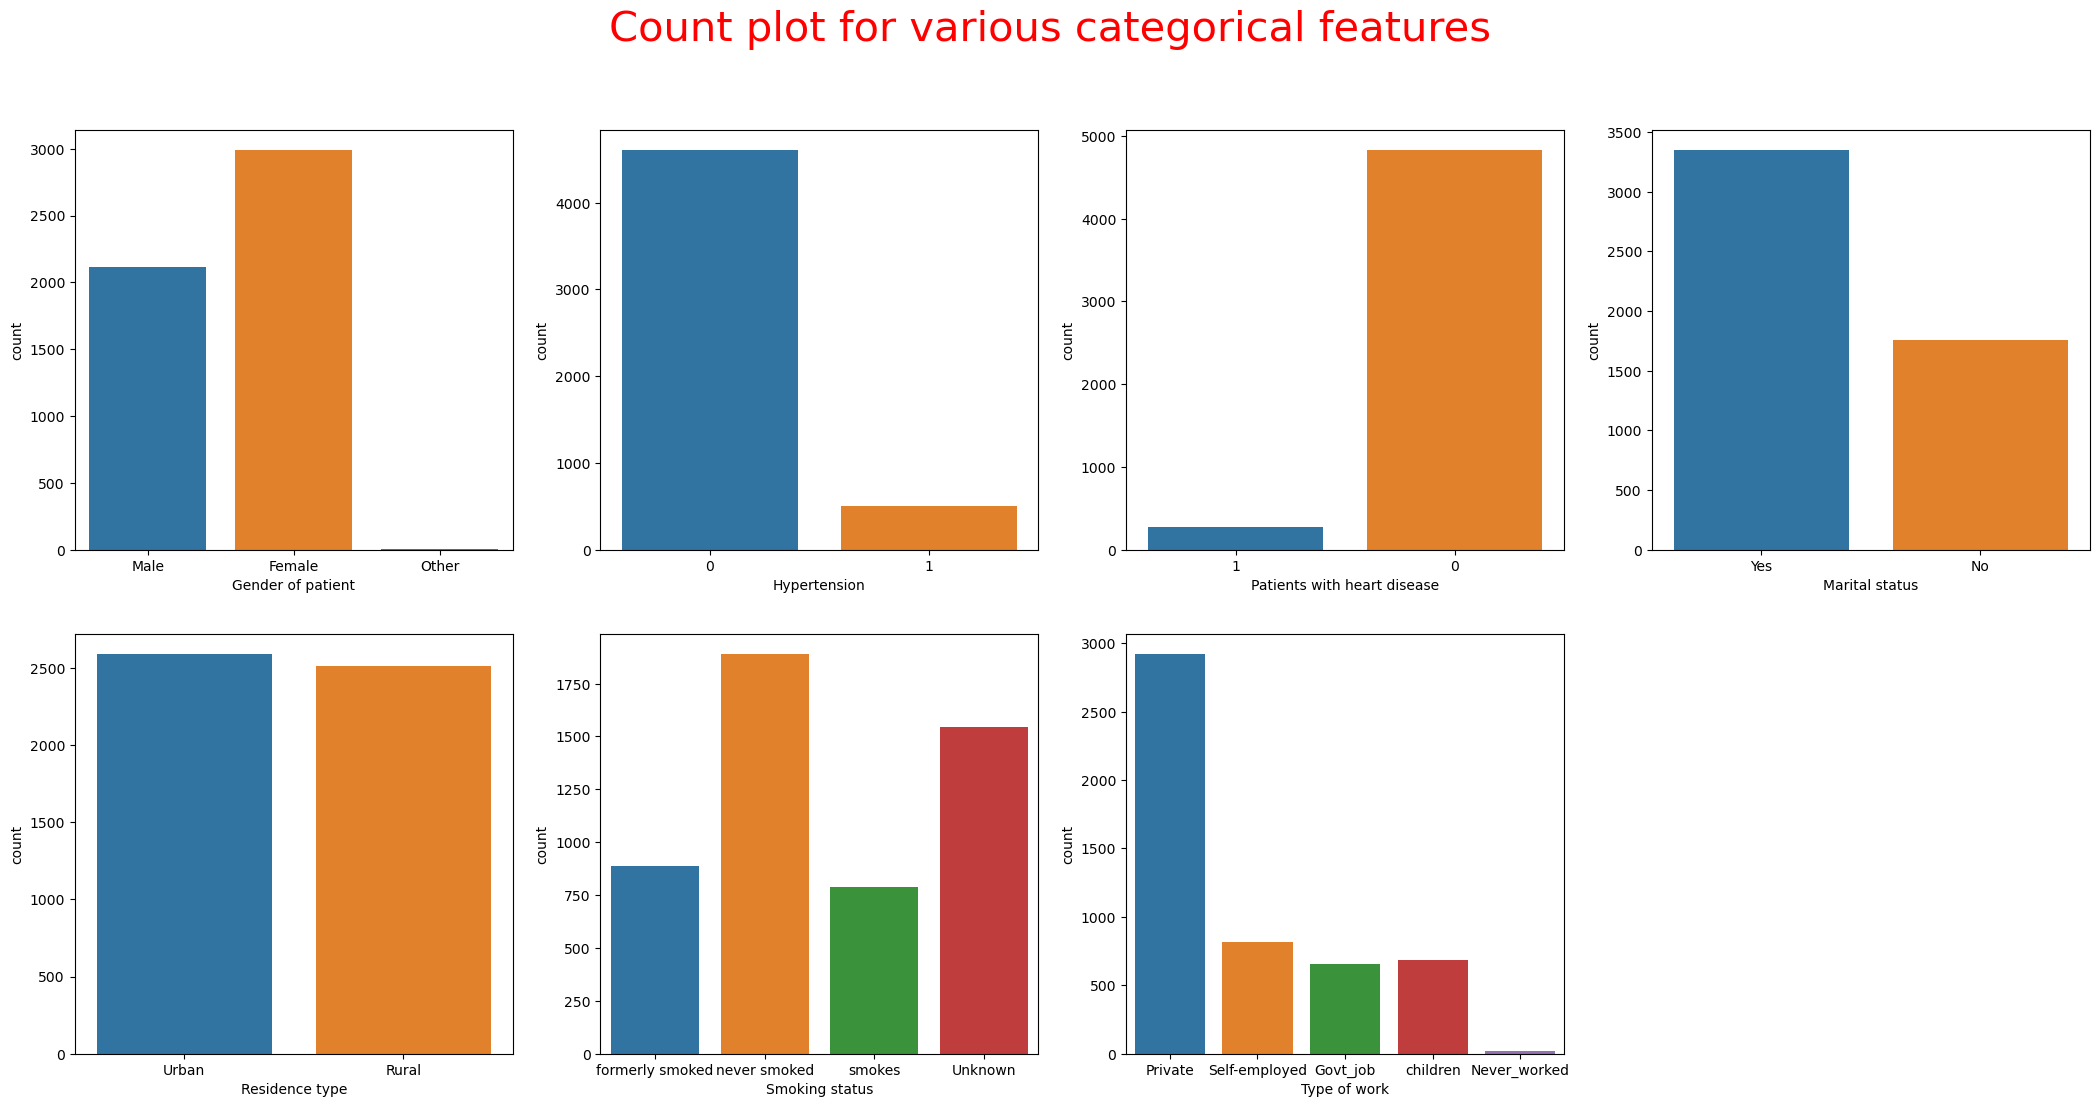

In [15]:
fig, ax = plt.subplots(2,4, figsize=(26,12))
plt.suptitle('Count plot for various categorical features', fontsize=30, color='red')

sns.countplot(x=df['gender'], ax=ax[0,0], data=df)
ax[0,0].set(xlabel = 'Gender of patient')

sns.countplot(x=df['hypertension'], ax=ax[0,1], data=df)
ax[0,1].set(xlabel = 'Hypertension')

sns.countplot(x=df['heart_disease'], ax=ax[0,2], data=df)
ax[0,2].set(xlabel = 'Patients with heart disease')

sns.countplot(x=df['ever_married'], ax=ax[0,3], data=df)
ax[0,3].set(xlabel = 'Marital status')

sns.countplot(x=df['Residence_type'], ax=ax[1,0], data=df)
ax[1,0].set(xlabel = 'Residence type')

sns.countplot(x=df['smoking_status'], ax=ax[1,1], data=df)
ax[1,1].set(xlabel = 'Smoking status')

sns.countplot(x=df['work_type'], ax=ax[1,2], data=df)
ax[1,2].set(xlabel = 'Type of work')

ax[1,3].axis('off')

plt.show()

In [16]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [17]:
#Lets drop the other column on Gender
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

# Visualising the categorical variables based on the target variable

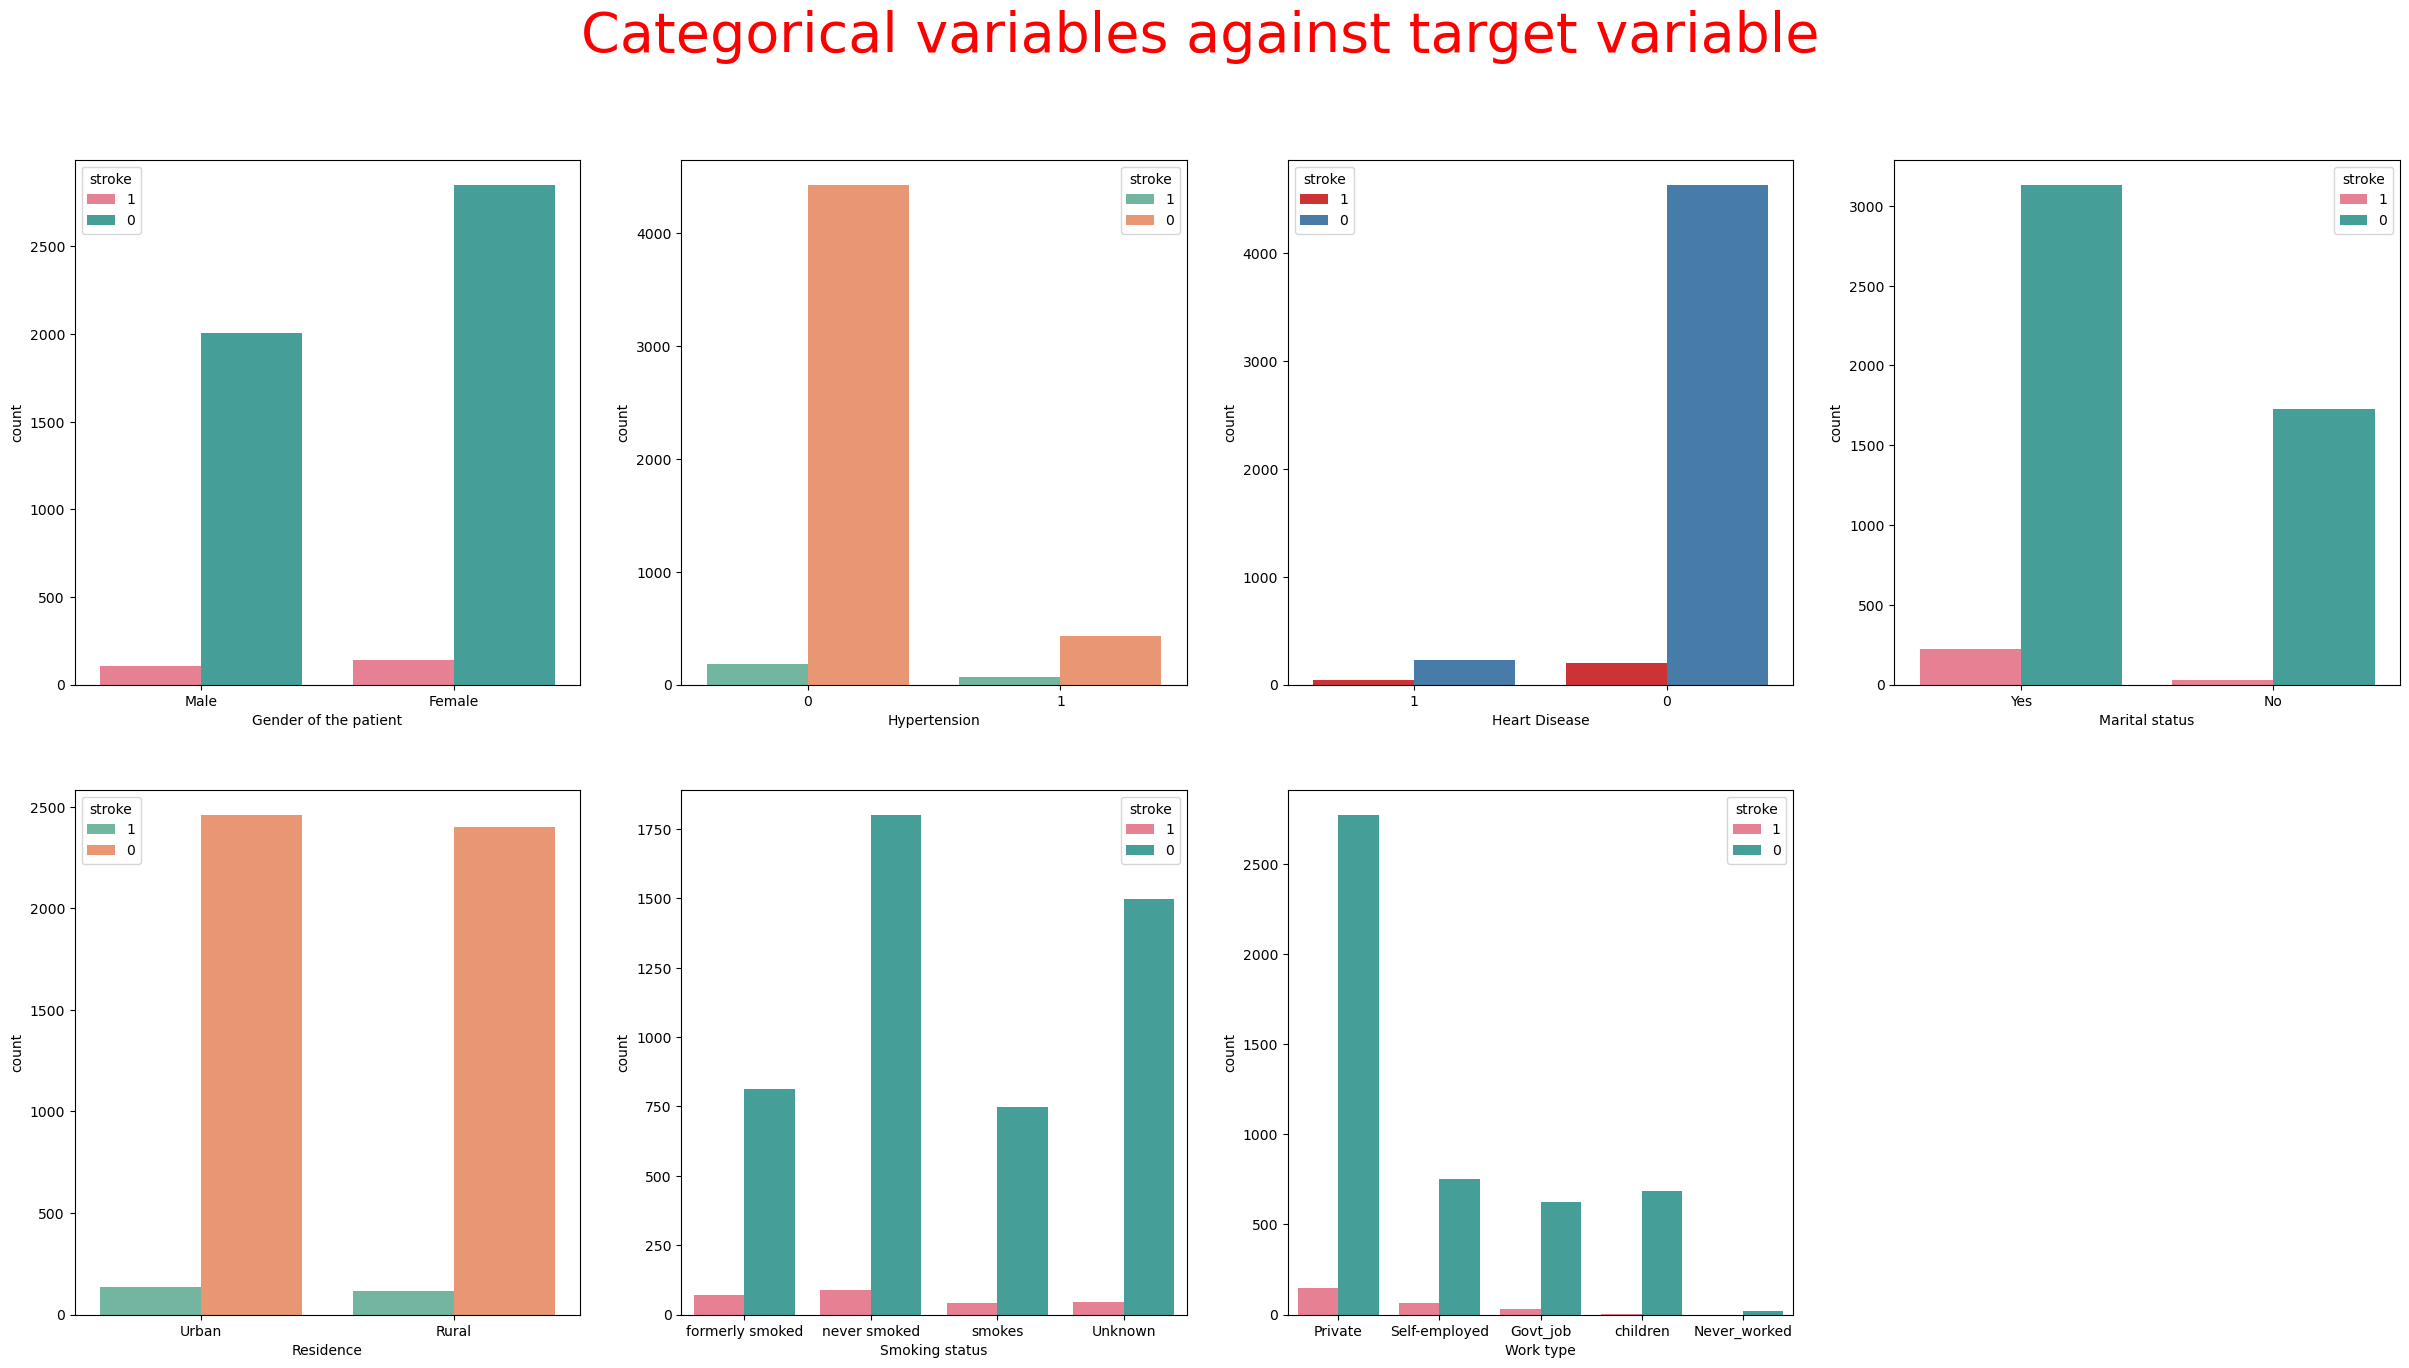

In [18]:
fig, ax = plt.subplots(2,4, figsize=(30,15))
plt.suptitle('Categorical variables against target variable', fontsize=40, color='red')

sns.countplot(x=df['gender'], ax=ax[0,0], hue='stroke', data=df, palette='husl')
ax[0,0].set(xlabel = 'Gender of the patient')

sns.countplot(x=df['hypertension'], ax=ax[0,1], hue='stroke', data=df, palette='Set2')
ax[0,1].set(xlabel = 'Hypertension')

sns.countplot(x=df['heart_disease'], ax=ax[0,2], hue='stroke', data=df, palette='Set1')
ax[0,2].set(xlabel = 'Heart Disease')

sns.countplot(x=df['ever_married'], ax=ax[0,3], hue='stroke', data=df, palette='husl')
ax[0,3].set(xlabel = 'Marital status')

sns.countplot(x=df['Residence_type'], ax=ax[1,0], hue='stroke', data=df, palette='Set2')
ax[1,0].set(xlabel = 'Residence')

sns.countplot(x=df['smoking_status'], ax=ax[1,1], hue='stroke', data=df, palette='husl')
ax[1,1].set(xlabel = 'Smoking status')

sns.countplot(x=df['work_type'], ax=ax[1,2], hue='stroke', data=df, palette='husl')
ax[1,2].set(xlabel = 'Work type')

ax[1,3].axis('off')

plt.show()

In [19]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [20]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# ENCODING

In [21]:
df2 = pd.get_dummies(df, drop_first = True)

The pd.get_dummies() function is a pandas function that is used to convert categorical variables into dummy/indicator variables. The resulting DataFrame will have a binary indicator variable (0 or 1) for each unique category in the original column.

The drop_first parameter is an optional boolean argument that specifies whether to drop the first level of each categorical variable. This is done to avoid the "dummy variable trap", which occurs when one of the variables can be predicted from the others (i.e., perfect multicollinearity). By dropping the first level, we remove the redundant information and avoid the trap.



In [22]:
df2.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,5.432367,3.600048,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,5.309307,3.335770,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,4.662684,3.481240,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,5.143008,3.538057,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,5.159745,3.178054,0,1,0,1,0,0,1,0,0,0,1,0,1


# Scaling

In [23]:
scaler = StandardScaler()
df2[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df2[['age', 'avg_glucose_level', 'bmi']])

In [24]:
df3 = df2.copy()

In [25]:
df3.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.051242,2.320709,1.044308,1,0,1,1,0,1,0,0,1,1,0,0,1
1,0.785889,1.980714,0.027004,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1.626174,0.194204,0.586972,1,0,1,1,0,1,0,0,0,0,1,0,1
3,0.255182,1.521257,0.805680,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1.581949,1.567499,-0.580102,0,1,0,1,0,0,1,0,0,0,1,0,1


# Data Splitting

In [26]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy = 'minority')
X = df3.drop(['stroke_1'], axis=1)
y = df3['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

here, we are using oversampler class from imblearn library to over sample the minority class for the df3.

we first create an instance with RandomOverSampler class with the sampling strategy to be minority meaning we want to oversample the class in the target variable stroke 1.

Then, we call the fit_resample() method of the RandomOverSampler object with X and y as arguments. This method oversamples the minority class in y and returns the oversampled X and y as new variables X_over and y_over.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [28]:
print(y_train.value_counts())
print(y_test.value_counts())

1    3892
0    3884
Name: stroke_1, dtype: int64
0    976
1    968
Name: stroke_1, dtype: int64


1 represents stroke and 0 represents no stroke

# KNN Model

In [29]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

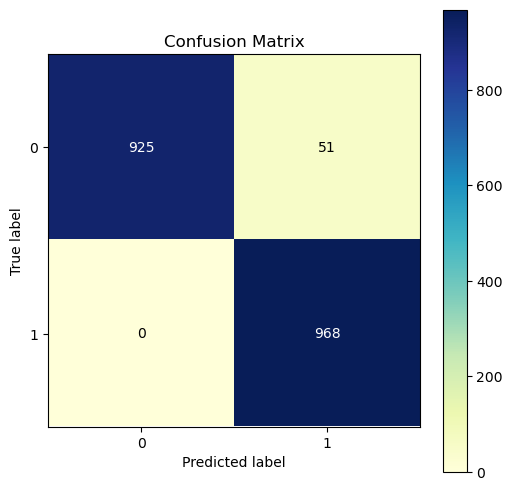

In [30]:
# Plotting the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_knn_pred, figsize=(6,6), cmap='YlGnBu')

In [31]:
# Accuracy score
print('Accuracy:', accuracy_score(y_test,y_knn_pred))

Accuracy: 0.9737654320987654


It's clear that we had 0 false negatives meaning we predicted all the patients who had a stroke

# Random Forest 

In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

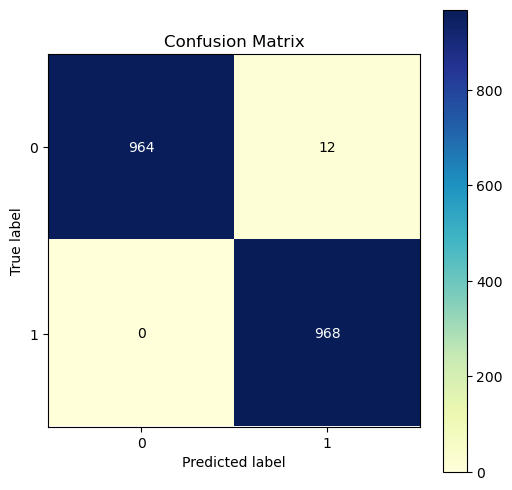

In [33]:
skplt.metrics.plot_confusion_matrix(y_test, rf_pred, figsize=(6,6), cmap='YlGnBu')

In [34]:
print('Accuracy:', accuracy_score(y_test, rf_pred))

Accuracy: 0.9938271604938271


It's clear that even when random forest used there are no false negatives